In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#plt.style.use('ggplot')

In [3]:
%matplotlib inline

# F-RCNN Second stage

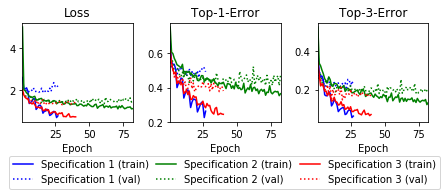

In [4]:
second_stage_last = pd.read_csv('./results/f_rcnn/second_stage/history_last_layer.csv', index_col=[0])
second_stage_last.set_index(second_stage_last.index + 1, inplace=True)
second_stage_dense = pd.read_csv('./results/f_rcnn/second_stage/history_all_dense_layers.csv', index_col=[0])
second_stage_dense.set_index(second_stage_dense.index + 1, inplace=True)
second_stage_conv_and_dense = pd.read_csv('./results/f_rcnn/second_stage/history_dense_and_conv.csv', index_col=[0])
second_stage_conv_and_dense.set_index(second_stage_conv_and_dense.index + 1, inplace=True)
second_stage_loss_cols = [colname for colname in second_stage_conv_and_dense.columns if 'loss' in colname]
second_stage_top_1_error_cols = [colname for colname in second_stage_conv_and_dense.columns if '1_error' in colname]
second_stage_top_3_error_cols = [colname for colname in second_stage_conv_and_dense.columns if '3_error' in colname]
fig_second_stage, ax_second_stage = plt.subplots(nrows=1, ncols=3, figsize=(6.17,2.7))

pd.concat([second_stage_last[second_stage_loss_cols], 
           second_stage_dense[second_stage_loss_cols], 
           second_stage_conv_and_dense[second_stage_loss_cols]], axis=1).plot(ax=ax_second_stage[0],
                                                                        color= sorted(['b', 'g', 'r']*2), 
                                                                        style= ['-', ':'] * 3,
                                                                        legend=False)

pd.concat([second_stage_last[second_stage_top_1_error_cols], 
           second_stage_dense[second_stage_top_1_error_cols], 
           second_stage_conv_and_dense[second_stage_top_1_error_cols]], axis=1).plot(ax=ax_second_stage[1],
                                                                               color= sorted(['b', 'g', 'r']*2), 
                                                                               style= ['-', ':'] * 3, 
                                                                               legend=False)

pd.concat([second_stage_last[second_stage_top_3_error_cols], 
           second_stage_dense[second_stage_top_3_error_cols], 
           second_stage_conv_and_dense[second_stage_top_3_error_cols]], axis=1).plot(ax=ax_second_stage[2],
                                                                               color= sorted(['b', 'g', 'r']*2), 
                                                                               style= ['-', ':'] * 3, 
                                                                               legend=False)

for ax in ax_second_stage:
    ax.set_xlabel('Epoch')
    
ax_second_stage[0].set_title('Loss')
ax_second_stage[1].set_title('Top-1-Error')
ax_second_stage[2].set_title('Top-3-Error')

#ax_second_stage[0].set_ylim(1,4)
#ax_second_stage[1].set_ylim(0.25,1)
#ax_second_stage[2].set_ylim(0,0.75)

lines = ax_second_stage[0].legend().legendHandles
ax_second_stage[0].legend_.remove()

lgd = fig_second_stage.legend(lines, 
                     ('Specification 1 (train)', 'Specification 1 (val)', 'Specification 2 (train)', 'Specification 2 (val)', 'Specification 3 (train)', 'Specification 3 (val)'), 
                     bbox_to_anchor=(0.02, 0.09, 0.97, .102), loc=1, mode="expand", borderaxespad=0., ncol=3)

fig_second_stage.tight_layout()
fig_second_stage.subplots_adjust(bottom=0.35)
fig_second_stage.savefig('./results/f_rcnn/second_stage/plots/loss_error_plot.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

In [15]:
display(second_stage_last.loc[second_stage_last['val_loss'].idxmin(),:])
print('Training stopped after {} epochs'.format(second_stage_last.shape[0]))

loss               1.381092
top_1_error        0.400152
top_3_error        0.172637
val_loss           1.909832
val_top_1_error    0.469907
val_top_3_error    0.216435
Name: 6, dtype: float64

Training stopped after 27 epochs


In [16]:
display(second_stage_dense.loc[second_stage_dense['val_loss'].idxmin(),:])
print('Training stopped after {} epochs'.format(second_stage_dense.shape[0]))

loss               1.184218
top_1_error        0.378462
top_3_error        0.134615
val_loss           1.375825
val_top_1_error    0.417143
val_top_3_error    0.180571
Name: 61, dtype: float64

Training stopped after 82 epochs


In [17]:
display(second_stage_conv_and_dense.loc[second_stage_conv_and_dense['val_loss'].idxmin(),:])
print('Training stopped after {} epochs'.format(second_stage_conv_and_dense.shape[0]))

loss               1.044933
top_1_error        0.344615
top_3_error        0.115385
val_loss           1.314995
val_top_1_error    0.376136
val_top_3_error    0.146591
Name: 19, dtype: float64

Training stopped after 40 epochs
